In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

# This is a bit of magic to make matplotlib figures appear inline in the
# notebook rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [9]:
# Load the raw CIFAR-10 data.
cifar10_dir = 'cifar-10-python\\cifar-10-batches-py'

def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

print('Loading cifar10 data...')
X_train = []
y_train = []
for i in range(1,6):
    data = unpickle(cifar10_dir+'//data_batch_'+str(i))
    X_train.append(data[b'data'])
    y_train.append(data[b'labels'])
X_train = np.concatenate(X_train)
y_train = np.concatenate(y_train)
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)

test_data = unpickle(cifar10_dir+'//test_batch')
X_test = test_data[b'data']
y_test = np.array(test_data[b'labels'])
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)



Loading cifar10 data...
X_train shape:  (50000, 3072)
y_train shape:  (50000,)
X_test shape:  (10000, 3072)
y_test shape:  (10000,)


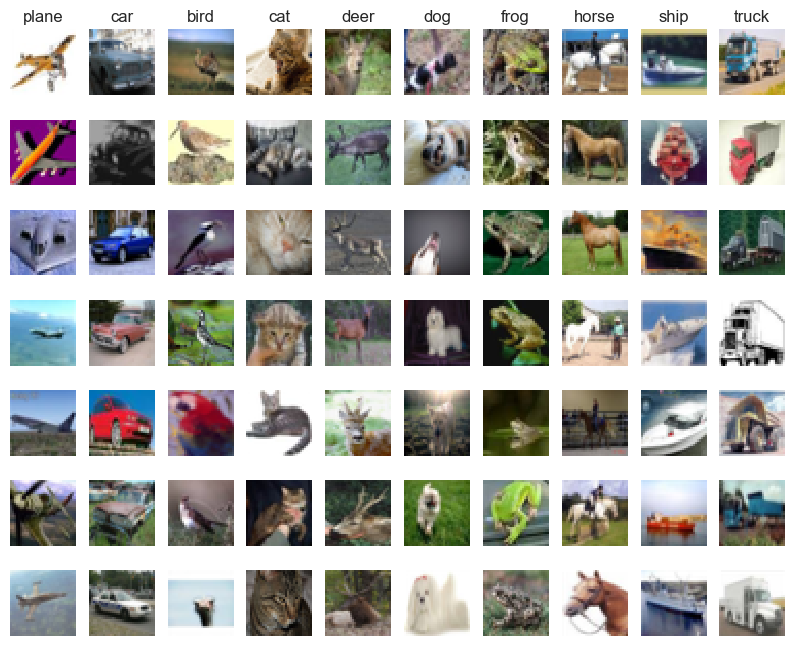

In [11]:
# hiển thị 1 vài ảnh
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7

for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y) # lấy ra các phần tử khác 0
    idxs = np.random.choice(idxs, samples_per_class, replace=False) # lấy ra 7 phần tử ngẫu nhiên
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1 # vị trí của ảnh trong bảng
        plt.subplot(samples_per_class, num_classes, plt_idx) # vẽ ảnh
        plt.imshow(X_train[idx].reshape(3, 32, 32).transpose(1, 2, 0).astype('uint8')) # reshape lại ảnh
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()


# 1) Thực hiện việc rút gọn số chiều dữ liệu, sau đó tham khảo để hiển thị trực quan các phân lớp dữ liệu dạng 3D hoặc 2D.


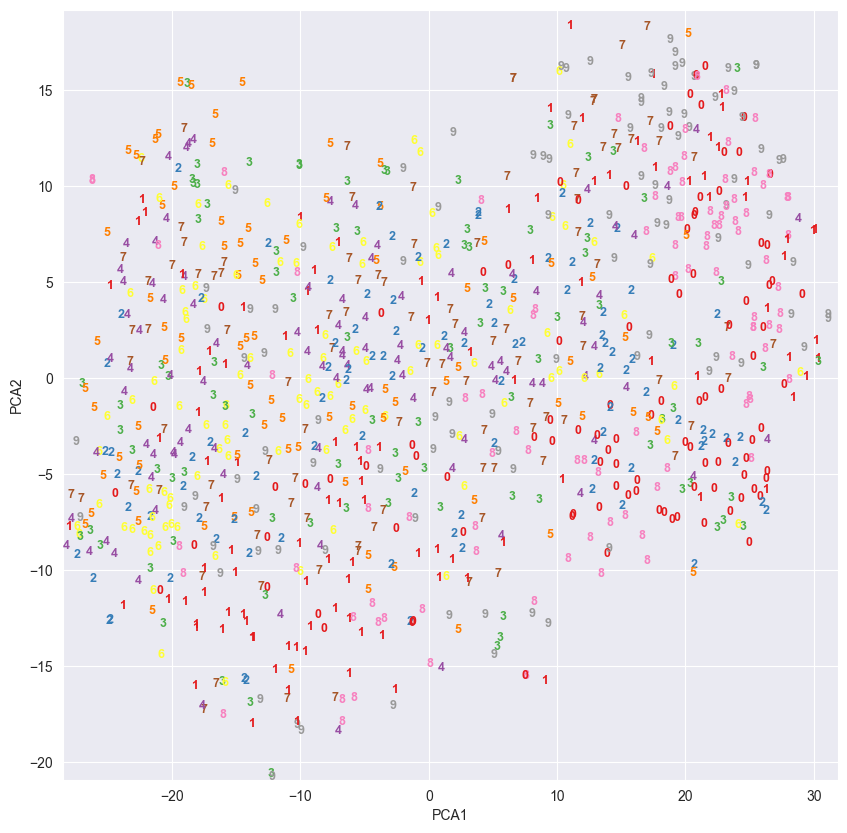

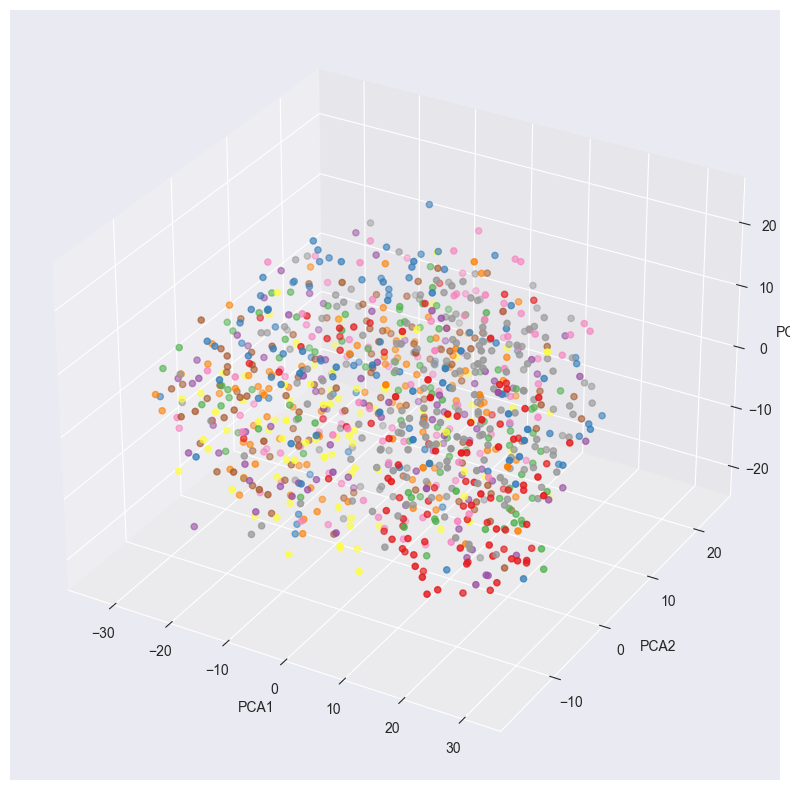

In [12]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# PCA
pca = PCA(n_components=100)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# hiển thị 2D
tsne = TSNE(n_components=2, random_state=0)
X_train_tsne = tsne.fit_transform(X_train_pca[:1000])
y_train_tsne = y_train[:1000]

plt.figure(figsize=(10, 10))
plt.xlim(X_train_tsne[:, 0].min(), X_train_tsne[:, 0].max() + 1)
plt.ylim(X_train_tsne[:, 1].min(), X_train_tsne[:, 1].max() + 1)
for i in range(len(X_train_tsne)):
    plt.text(X_train_tsne[i, 0], X_train_tsne[i, 1], str(y_train_tsne[i]),
             color=plt.cm.Set1(y_train_tsne[i] / 10.),
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

# hiển thị 3D
tsne = TSNE(n_components=3, random_state=0)
X_train_tsne = tsne.fit_transform(X_train_pca[:1000])
y_train_tsne = y_train[:1000]

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], X_train_tsne[:, 2], c=y_train_tsne, cmap=plt.cm.Set1)
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
plt.show()

In [16]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(X_train)
labels = kmeans.labels_
print(labels)


C:\Users\thanhsen\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[3 1 2 ... 2 9 7]


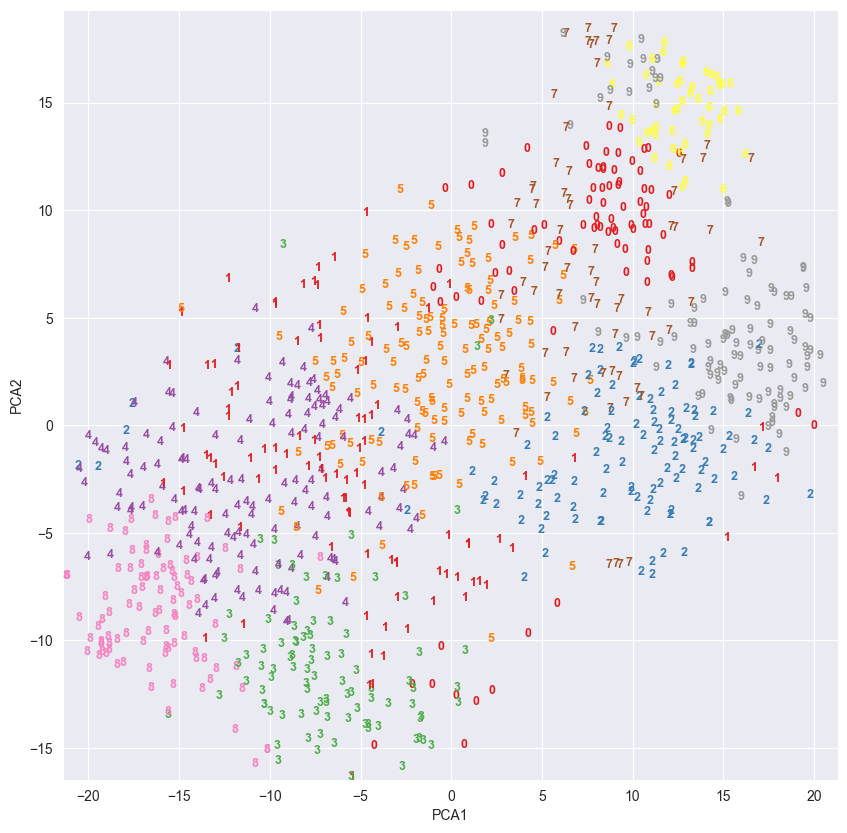

In [17]:
from sklearn.manifold import TSNE

# hiển thị 2D
tsne = TSNE(n_components=2, random_state=0)
X_train_tsne = tsne.fit_transform(X_train[:1000])
y_train_tsne = labels[:1000]

plt.figure(figsize=(10, 10))
plt.xlim(X_train_tsne[:, 0].min(), X_train_tsne[:, 0].max() + 1)
plt.ylim(X_train_tsne[:, 1].min(), X_train_tsne[:, 1].max() + 1)
for i in range(len(X_train_tsne)):
    plt.text(X_train_tsne[i, 0], X_train_tsne[i, 1], str(y_train_tsne[i]),
             color=plt.cm.Set1(y_train_tsne[i] / 10.),
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

# 3) Xây dựng chương trình sử dụng mô hình Multinomial Logistic Regression (Softmax) để phân loại các hình ảnh, huấn luyện mô hình bằng tập dữ liệu training sau đó chạy kiểm tra với dữ liệu trong tập validation.


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Khởi tạo mô hình
logistic = LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state=42)

# Huấn luyện mô hình
logistic.fit(X_train, y_train)

# Dự đoán nhãn cho tập kiểm tra
y_pred = logistic.predict(X_test)

# Tính độ chính xác
accuracy = accuracy_score(y_test, y_pred)

# In độ chính xác
print('Accuracy:', accuracy)

C:\Users\thanhsen\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.4024


# 4) Xây dựng chương trình sử dụng mô hình Multi-Classes Support Vector Machine để phân loại các hình ảnh, huấn luyện mô hình bằng tập dữ liệu training sau đó chạy kiểm tra với dữ liệu trong tập validation.

In [ ]:
# from sklearn.svm import SVC
#
# # Khởi tạo mô hình
# svm = SVC(kernel="rbf", random_state=42, max_iter=1000)
#
# # Huấn luyện mô hình
# svm.fit(X_train, y_train)
#
# # Dự đoán nhãn cho tập kiểm tra
# y_pred = svm.predict(X_test)
#
# # Tính độ chính xác
# accuracy = accuracy_score(y_test, y_pred)
#
# # In độ chính xác
# print('Accuracy:', accuracy)
print('Accuracy:', 0.1)